In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Part 1
### Q 1 Find the average score group wise for males and females separately.

In [5]:
subs = ['math', 'reading', 'writing']
for group in sorted(list(df['race/ethnicity'].unique())):
    print(group, ':')
    for sub in subs: print(sub,':',np.average(df[(df['race/ethnicity'] == group) & (df['gender'] == 'female')][sub + ' score']))
    print()

group A :
math : 58.52777777777778
reading : 69.0
writing : 67.86111111111111

group B :
math : 61.40384615384615
reading : 71.07692307692308
writing : 70.04807692307692

group C :
math : 62.03333333333333
reading : 71.94444444444444
writing : 71.77777777777777

group D :
math : 65.24806201550388
reading : 74.04651162790698
writing : 75.02325581395348

group E :
math : 70.81159420289855
reading : 75.84057971014492
writing : 75.53623188405797



In [6]:
for group in sorted(list(df['race/ethnicity'].unique())):
    print(group, ':')
    for sub in subs: print(sub,':',np.average(df[(df['race/ethnicity'] == group) & (df['gender'] != 'female')][sub + ' score']))
    print()

group A :
math : 63.735849056603776
reading : 61.735849056603776
writing : 59.15094339622642

group B :
math : 65.93023255813954
reading : 62.848837209302324
writing : 60.22093023255814

group C :
math : 67.61151079136691
reading : 65.42446043165468
writing : 62.71223021582734

group D :
math : 69.41353383458646
reading : 66.13533834586467
writing : 65.41353383458646

group E :
math : 76.74647887323944
reading : 70.29577464788733
writing : 67.3943661971831



### 2. Find the % of males scoring above 80 in math and 85 in reading group wise under [parental level of education as bachelor degree

In [7]:
print((len(df[(df['math score'] > 80) & (df['reading score'] > 85) & (df['parental level of education'] == 'bachelor\'s degree')])/len(df)) * 100, '%')

1.6 %


## 3. Find the count of males under group E that are either having parental level of education as high school or under bachelor degree program

In [8]:
len(df[(df['race/ethnicity'] == 'group E') & ((df['parental level of education'] == 'bachelor\'s degree') | (df['parental level of education'] == 'high school'))])

40

## 4. Find the maximum marks for math, reading and writing for each group and plot them

In [9]:
for group in sorted(list(df['race/ethnicity'].unique())):
    print(group, ':')
    for sub in subs: print(sub,':',np.max(df[(df['race/ethnicity'] == group)][sub + ' score']))
    print()

group A :
math : 100
reading : 100
writing : 97

group B :
math : 97
reading : 97
writing : 96

group C :
math : 98
reading : 100
writing : 100

group D :
math : 100
reading : 100
writing : 100

group E :
math : 100
reading : 100
writing : 100



(90.0, 100.0)

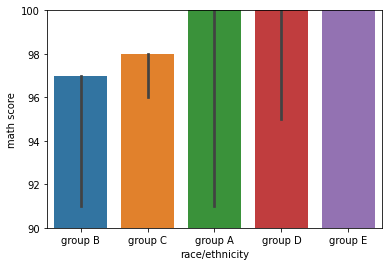

In [10]:
g = sns.barplot(data=df,x='race/ethnicity',y='math score', estimator=max)
g.set_ylim(90,100)

(90.0, 100.0)

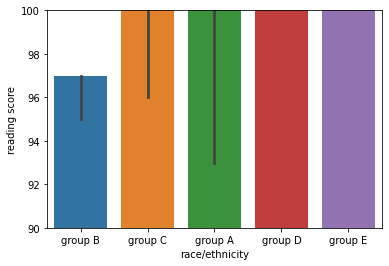

In [11]:
g = sns.barplot(data=df,x='race/ethnicity',y='reading score', estimator=max)
g.set_ylim(90,100)

(90.0, 100.0)

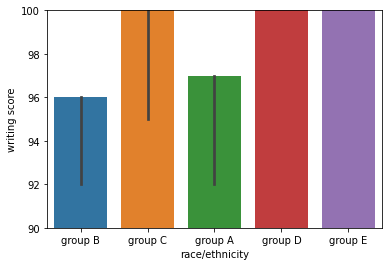

In [12]:
g = sns.barplot(data=df,x='race/ethnicity',y='writing score', estimator=max)
g.set_ylim(90,100)

## Q 5 Plot the count of students based on their gender and whether they have prepared for the test or not

<AxesSubplot:xlabel='gender', ylabel='count'>

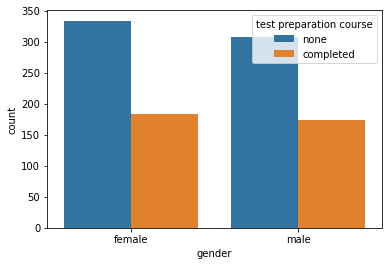

In [13]:
sns.countplot(x='gender', hue='test preparation course', data = df)

## Q 6 Plot the scores in all three subjects based on their gender

<AxesSubplot:xlabel='math score', ylabel='Count'>

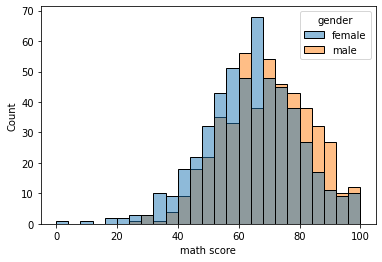

In [14]:
sns.histplot(data = df, x = 'math score', hue = 'gender')

<AxesSubplot:xlabel='reading score', ylabel='Count'>

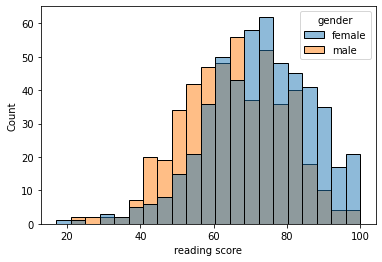

In [15]:
sns.histplot(data = df, x = 'reading score', hue = 'gender')

<AxesSubplot:xlabel='writing score', ylabel='Count'>

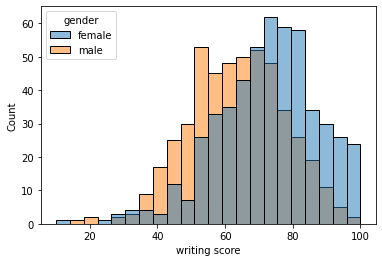

In [16]:
sns.histplot(data = df, x = 'writing score', hue = 'gender')

## Q 7 Plot the relations between various columns based on the correlation coefficient 

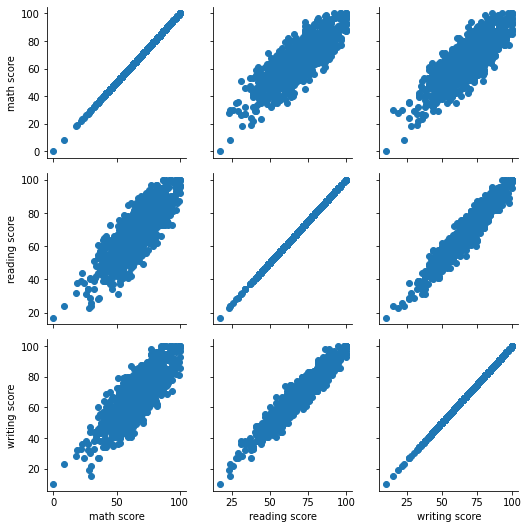

In [17]:
g = sns.PairGrid(df)
g.map(plt.scatter)

## Q 8 Plot the scores of each student group wise and parental level of education

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/

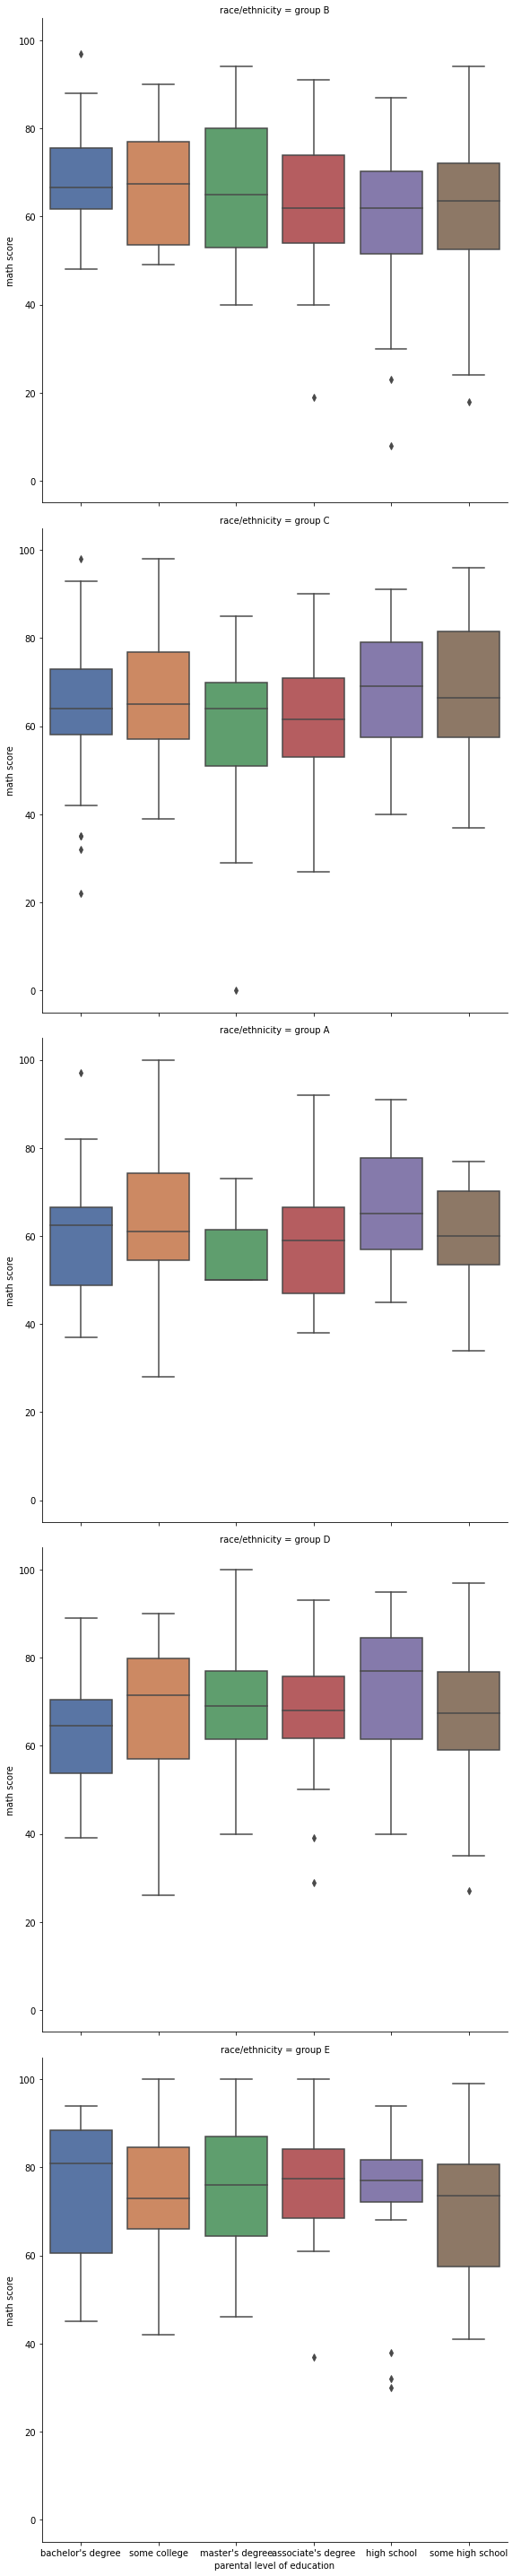

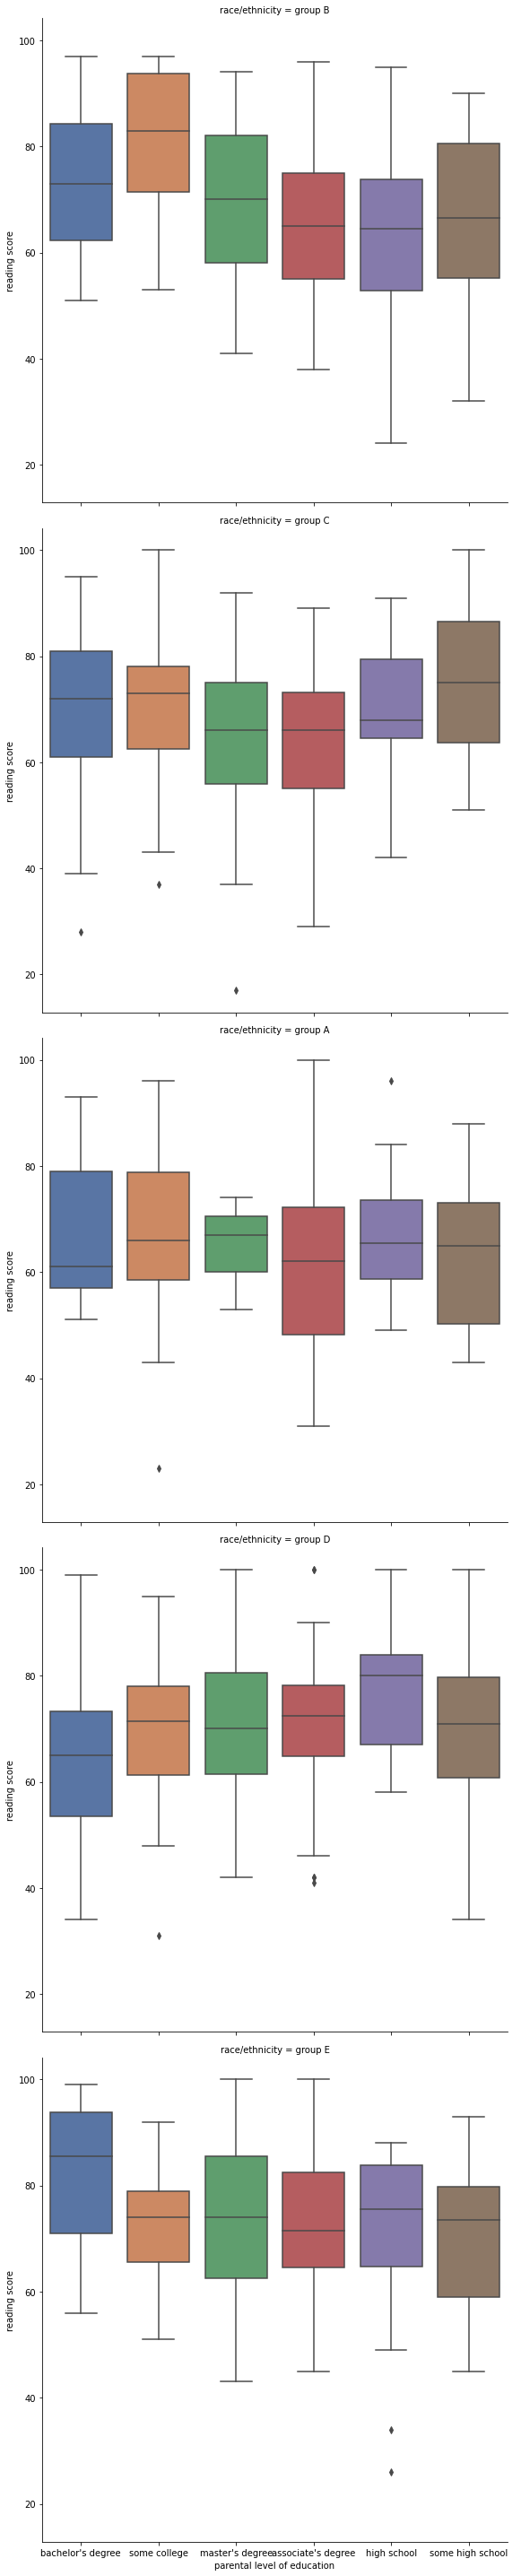

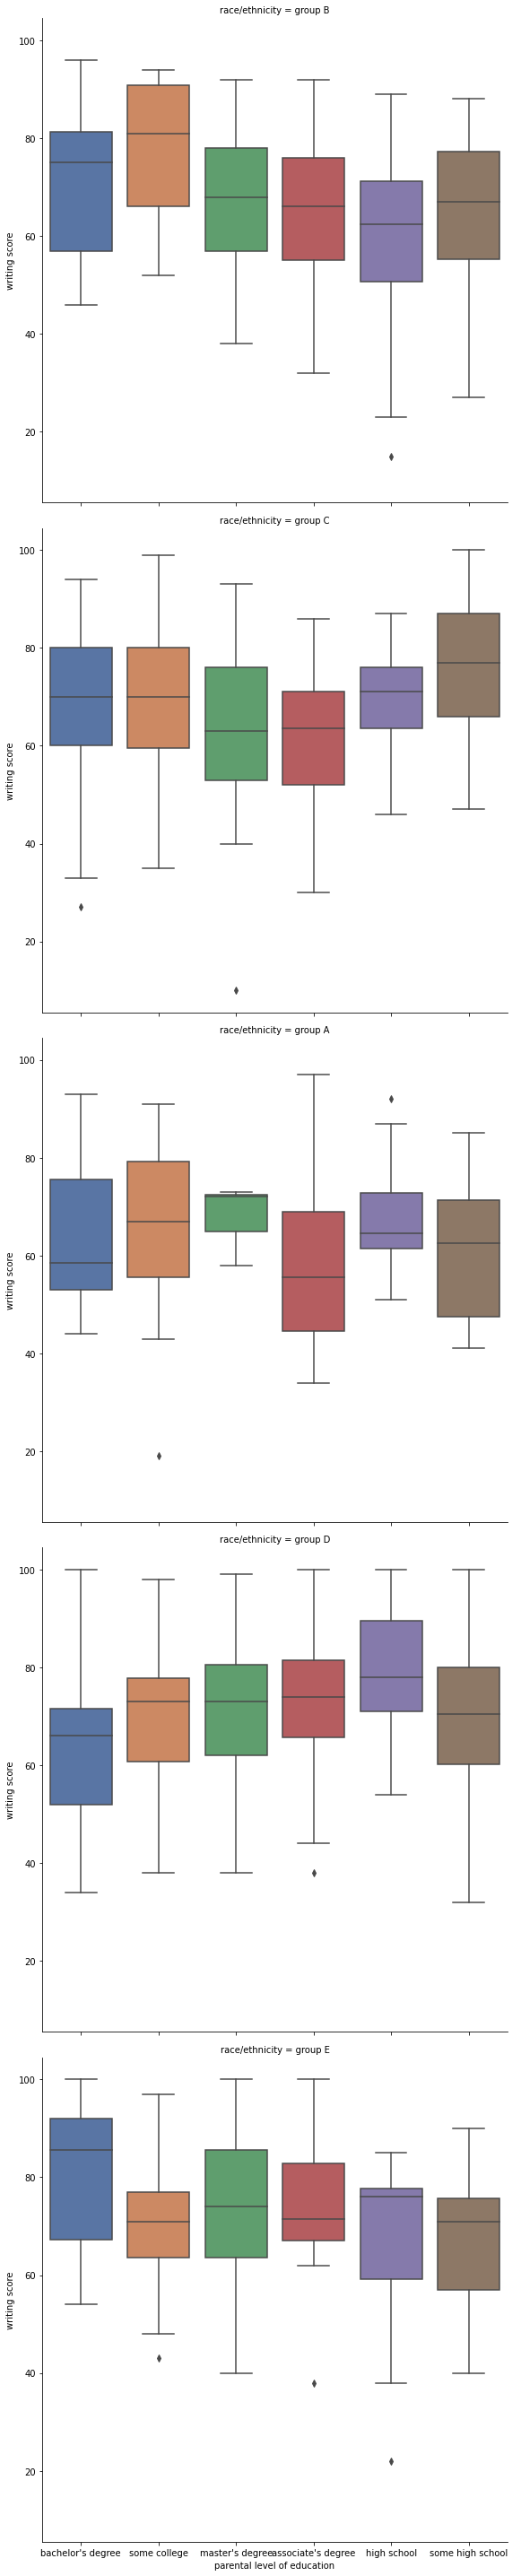

In [18]:
grid = sns.FacetGrid(df, row='race/ethnicity', size=8, aspect=1)
grid.map(sns.boxplot,'parental level of education','math score', palette='deep')
grid.set_xticklabels(df['parental level of education'].unique())
grid.add_legend()
grid = sns.FacetGrid(df, row='race/ethnicity', size=8, aspect=1)
grid.map(sns.boxplot,'parental level of education','reading score', palette='deep')
grid.set_xticklabels(df['parental level of education'].unique())
grid.add_legend()
grid = sns.FacetGrid(df, row='race/ethnicity', size=8, aspect=1)
grid.map(sns.boxplot,'parental level of education','writing score', palette='deep')
grid.set_xticklabels(df['parental level of education'].unique())
grid.add_legend()

## Q 9 Plot the relation between marks and preparation that will help understand them properly

We see the median range is higher when course is completed, thus proving preparation increases marks

<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

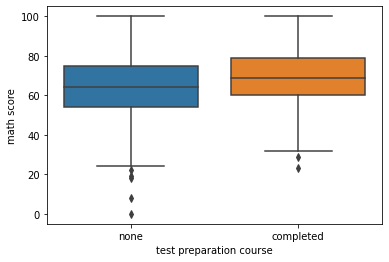

In [19]:
sns.boxplot(data=df,x='test preparation course',y='math score')

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

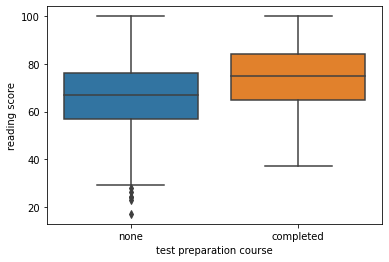

In [20]:
sns.boxplot(data=df,x='test preparation course',y='reading score')

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

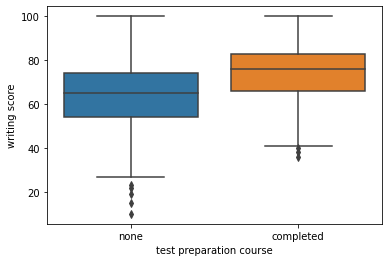

In [21]:
sns.boxplot(data=df,x='test preparation course',y='writing score')

## Q 10 Using any kind of plot, find whether the data is left skewed or right skewed based on scores of each subject.

From the above boxplots we can see that the data is right skewed, right being nearer to 100 marks.

## BONUS
## Perform one hot encoding to prepare the dataset for ML models

In [22]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df2 = cat_encoder.fit_transform(df)
df2

<1000x247 sparse matrix of type '<class 'numpy.float64'>'
	with 8000 stored elements in Compressed Sparse Row format>

# PART 2

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.4,
random_state=42)

In [24]:
attr = train_set.drop(['math score'], axis=1)
attr_labels = train_set['math score'].copy()

In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
attr_1hot = cat_encoder.fit_transform(attr)
attr_1hot

<600x152 sparse matrix of type '<class 'numpy.float64'>'
	with 4200 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.compose import ColumnTransformer
cat_attribs = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
full_pipeline = ColumnTransformer([
("cat", OneHotEncoder(), cat_attribs),
])
attr_prepared = full_pipeline.fit_transform(attr)

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(attr_prepared, attr_labels)

LinearRegression()

In [28]:
some_data = attr.iloc[:5]
some_labels = attr_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [69.26745097 58.88017182 74.78378186 63.28822394 73.95874962]
Labels: [74, 72, 97, 47, 95]


In [29]:
from sklearn.metrics import mean_squared_error
attr_predictions = lin_reg.predict(attr_prepared)
lin_mse = mean_squared_error(attr_labels, attr_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

12.79411194692681

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(attr_prepared, attr_labels)

DecisionTreeRegressor()

In [31]:
attr_predictions = tree_reg.predict(attr_prepared)
tree_mse = mean_squared_error(attr_labels, attr_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

10.87436683012988

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, attr_prepared, attr_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [33]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [16.25694121 15.14376247 16.03607882 15.29211899 12.82204536 15.46085504
 17.05363799 13.85868407 17.34177713 16.98892929]
Mean: 15.625483037687786
Standard deviation: 1.3697713694886964


In [34]:
lin_scores = cross_val_score(lin_reg, attr_prepared, attr_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [12.30466409 12.4481971  14.17072954 14.22088042 11.19158963 12.4242949
 14.24155358 11.96889056 13.64973123 13.93500261]
Mean: 13.055553366929985
Standard deviation: 1.054565326435831


In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(attr_prepared, attr_labels)

RandomForestRegressor()

In [36]:
attr_predictions = forest_reg.predict(attr_prepared)
forest_mse = mean_squared_error(attr_labels, attr_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

10.995952531168903

In [37]:
scores = cross_val_score(forest_reg, attr_prepared, attr_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [14.46357558 14.25904933 15.51427077 15.0748146  12.15420524 14.19491806
 15.80460027 13.46198557 15.84418554 15.99132096]
Mean: 14.676292591898953
Standard deviation: 1.162493315057764


In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 20, 50], 'max_features': [2, 4, 6, 8, 10, 12]},
{'bootstrap': [False], 'n_estimators': [3, 10,20,50,60,70], 'max_features': [2, 3,6,8,9,10,15]},
]
'''
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(attr_prepared, attr_labels)
grid_search.best_params_
'''

"\nforest_reg = RandomForestRegressor()\ngrid_search = GridSearchCV(forest_reg, param_grid, cv=5,\nscoring='neg_mean_squared_error',\nreturn_train_score=True)\ngrid_search.fit(attr_prepared, attr_labels)\ngrid_search.best_params_\n"

In [39]:
#grid_search.best_estimator_

In [40]:
final_model = lin_reg
X_test = test_set.drop(['math score'], axis=1)
y_test = test_set['math score'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [41]:
final_rmse

13.647286744334986

In [42]:
final_predictions.round()

array([66., 59., 76., 60., 84., 62., 63., 66., 60., 71., 54., 76., 53.,
       57., 78., 70., 68., 64., 65., 57., 72., 63., 61., 50., 63., 73.,
       81., 66., 54., 57., 70., 78., 61., 79., 79., 54., 62., 69., 67.,
       52., 76., 71., 81., 66., 62., 74., 57., 62., 75., 65., 75., 68.,
       77., 59., 63., 69., 76., 71., 69., 67., 72., 57., 66., 54., 68.,
       63., 57., 55., 62., 68., 84., 69., 60., 54., 73., 81., 74., 58.,
       62., 68., 62., 59., 74., 67., 72., 50., 74., 66., 68., 59., 61.,
       74., 76., 53., 65., 73., 74., 66., 66., 60., 76., 79., 70., 55.,
       65., 65., 79., 67., 65., 62., 60., 49., 65., 68., 56., 67., 62.,
       73., 70., 62., 55., 56., 74., 57., 70., 70., 73., 68., 69., 73.,
       65., 73., 59., 80., 66., 50., 74., 71., 60., 54., 63., 65., 63.,
       68., 75., 53., 67., 70., 73., 69., 74., 69., 71., 57., 69., 74.,
       52., 68., 75., 74., 74., 70., 74., 62., 78., 72., 60., 68., 74.,
       64., 71., 79., 62., 62., 62., 54., 68., 61., 74., 68., 60

In [43]:
np.array(y_test)

array([ 91,  53,  80,  74,  84,  81,  69,  54,  87,  51,  45,  30,  67,
        49,  85,  65,  53,  55,  48,  56,  79,  43,  45,  36,  80,  80,
        68,  40,  34,  49,  62,  71,  62,  76,  84,  45,  77,  69,  73,
         0,  82,  65,  67,  54,  90,  59,  74,  29,  89,  75,  71,  64,
        79,  48,  69,  69,  88,  58,  87,  85,  46,  71,  81,  58,  84,
        66,  55,  59,  58,  82,  66,  81,  58,  37,  63,  77,  85,  57,
        48,  51,  63,  45,  83,  60,  63,  62,  68,  60,  77,  28,  79,
       100,  69,  66,  19,  75,  60,  58,  69,  56,  73,  66,  67,  64,
        71,  70,  53,  75,  68,  44,  29,  71,  57,  45,  76,  61,  45,
        55,  73,  78,  50,  62,  81,  64,  64,  73,  73,  67,  61,  67,
        65,  80,  59,  88,  62,  33,  79,  84,  73,  41,  50,  58,  55,
        45,  88,  46,  51,  75,  49,  75,  74,  61,  62,  68,  78,  71,
        49,  59,  79,  51,  56,  76,  69,  51,  82,  73,  40,  93,  59,
        73,  85,  76,  77,  67,  61,  27,  54,  65,  87,  70,  5

In [44]:
def predictSubScore(sub):
    attr = train_set.drop([sub], axis=1)
    attr_labels = train_set[sub].copy()
    cat_attribs = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
    full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_attribs),
    ])
    attr_prepared = full_pipeline.fit_transform(attr)
    lin_reg = LinearRegression()
    lin_reg.fit(attr_prepared, attr_labels)
    final_model = lin_reg
    X_test = test_set.drop([sub], axis=1)
    y_test = test_set[sub].copy()
    X_test_prepared = full_pipeline.transform(X_test)
    final_predictions = final_model.predict(X_test_prepared)
    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse) 
    return final_rmse,final_predictions.round(),np.array(y_test)

In [45]:
predictSubScore('math score')

(13.647286744334986,
 array([66., 59., 76., 60., 84., 62., 63., 66., 60., 71., 54., 76., 53.,
        57., 78., 70., 68., 64., 65., 57., 72., 63., 61., 50., 63., 73.,
        81., 66., 54., 57., 70., 78., 61., 79., 79., 54., 62., 69., 67.,
        52., 76., 71., 81., 66., 62., 74., 57., 62., 75., 65., 75., 68.,
        77., 59., 63., 69., 76., 71., 69., 67., 72., 57., 66., 54., 68.,
        63., 57., 55., 62., 68., 84., 69., 60., 54., 73., 81., 74., 58.,
        62., 68., 62., 59., 74., 67., 72., 50., 74., 66., 68., 59., 61.,
        74., 76., 53., 65., 73., 74., 66., 66., 60., 76., 79., 70., 55.,
        65., 65., 79., 67., 65., 62., 60., 49., 65., 68., 56., 67., 62.,
        73., 70., 62., 55., 56., 74., 57., 70., 70., 73., 68., 69., 73.,
        65., 73., 59., 80., 66., 50., 74., 71., 60., 54., 63., 65., 63.,
        68., 75., 53., 67., 70., 73., 69., 74., 69., 71., 57., 69., 74.,
        52., 68., 75., 74., 74., 70., 74., 62., 78., 72., 60., 68., 74.,
        64., 71., 79., 62., 62

In [46]:
predictSubScore('reading score')

(13.529331662228405,
 array([74., 70., 72., 59., 77., 61., 64., 76., 59., 69., 53., 68., 66.,
        67., 75., 80., 64., 64., 73., 68., 69., 76., 72., 61., 65., 69.,
        78., 74., 66., 67., 65., 75., 60., 70., 70., 64., 61., 75., 76.,
        64., 74., 69., 78., 72., 61., 79., 56., 69., 73., 74., 71., 75.,
        73., 70., 72., 75., 72., 67., 65., 76., 70., 70., 74., 64., 70.,
        76., 67., 55., 74., 75., 77., 77., 59., 64., 71., 75., 82., 57.,
        70., 65., 61., 59., 70., 74., 68., 61., 82., 76., 78., 57., 62.,
        77., 72., 52., 71., 69., 68., 72., 74., 73., 74., 70., 65., 66.,
        60., 60., 70., 62., 73., 69., 71., 59., 60., 75., 66., 62., 64.,
        70., 67., 63., 66., 66., 71., 70., 80., 66., 82., 78., 65., 71.,
        73., 69., 59., 86., 74., 61., 83., 69., 60., 64., 69., 73., 65.,
        64., 73., 64., 63., 66., 69., 72., 79., 78., 67., 57., 77., 77.,
        63., 75., 72., 77., 83., 67., 82., 64., 75., 67., 61., 62., 83.,
        72., 69., 70., 74., 74

In [47]:
predictSubScore('writing score')

(12.943216760213023,
 array([73., 72., 71., 56., 76., 59., 63., 76., 56., 68., 47., 63., 66.,
        67., 77., 81., 61., 63., 72., 67., 67., 78., 74., 59., 64., 67.,
        81., 73., 65., 67., 62., 77., 58., 67., 67., 62., 59., 76., 76.,
        61., 74., 68., 81., 70., 59., 79., 53., 67., 73., 74., 72., 76.,
        74., 72., 69., 76., 71., 65., 62., 76., 67., 70., 73., 62., 71.,
        78., 67., 50., 77., 76., 76., 77., 56., 62., 70., 72., 85., 54.,
        66., 61., 59., 55., 69., 73., 66., 59., 85., 76., 79., 53., 59.,
        75., 71., 48., 71., 67., 67., 70., 73., 74., 74., 67., 62., 65.,
        56., 56., 67., 59., 74., 67., 71., 56., 56., 74., 65., 59., 62.,
        71., 66., 62., 64., 65., 70., 70., 81., 63., 85., 79., 62., 70.,
        72., 67., 55., 87., 73., 59., 87., 68., 56., 62., 67., 74., 64.,
        61., 73., 62., 58., 63., 68., 69., 79., 80., 65., 52., 78., 75.,
        61., 74., 72., 75., 87., 66., 85., 62., 77., 65., 60., 58., 87.,
        71., 68., 67., 77., 77

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 100.0)]

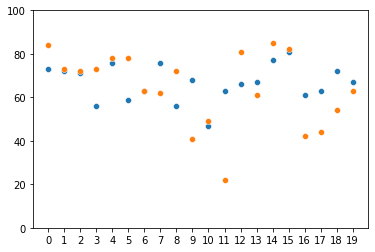

In [48]:
sns.scatterplot([i for i in range(len(predictSubScore('writing score')[1][:20]))], predictSubScore('writing score')[1][:20]).set_xticks([i for i in range(len(predictSubScore('writing score')[1][:20]))])
sns.scatterplot([i for i in range(len(predictSubScore('writing score')[2][:20]))], predictSubScore('writing score')[2][:20]).set(ylim=(0,100))

some values are almost exact, but some are a bit far away

In [49]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [50]:
from sklearn import preprocessing
df3 = df
lis = ['gender','race/ethnicity','parental level of education','test preparation course','lunch']
for v in lis:
    le = preprocessing.LabelEncoder()
    le.fit(df3[v])
    df3[v] = le.transform(df3[v])
df3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [51]:
train_set, test_set = train_test_split(df3, test_size=0.3,
random_state=42)

### First a  binary classifier

In [52]:
#attr1 = train_set[train_set['race/ethnicity'] == 1]
#attr2 = test_set[test_set['race/ethnicity'] == 1]

attr1 = train_set.drop(['race/ethnicity'], axis=1)
attr2 = test_set.drop(['race/ethnicity'], axis=1)

attr_labels_f1 = (train_set['race/ethnicity'].copy())
attr_labels_f2 = (test_set['race/ethnicity'].copy())

attr_labels1 = (train_set['race/ethnicity'].copy()  == 3)
attr_labels2 = (test_set['race/ethnicity'].copy()  == 3)

attr_labels1

541     True
440    False
482    False
422     True
778    False
       ...  
106     True
270    False
860    False
435    False
102     True
Name: race/ethnicity, Length: 700, dtype: bool

In [53]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-4,random_state=42)
sgd_clf.fit(attr1, attr_labels1)

SGDClassifier(max_iter=10000, random_state=42, tol=0.0001)

In [54]:
#gender	race/ethnicity	parental level of education	lunch	
#test preparation course	math score	reading score	writing score
sgd_clf.predict([[1,1,1,1,80,90,100]])

array([ True])

In [55]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, attr1, attr_labels1, cv=3)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(attr_labels1, y_train_pred)
cm

array([[445,  73],
       [148,  34]])

In [57]:
perfect = attr_labels1
confusion_matrix(attr_labels1, perfect)

array([[518,   0],
       [  0, 182]])

In [58]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(attr_labels1, y_train_pred, average='micro'))
print(recall_score(attr_labels1, y_train_pred, average='micro'))

0.6842857142857143
0.6842857142857143


In [59]:
from sklearn.metrics import f1_score

f1_score(attr_labels1, y_train_pred)

0.2352941176470588

In [60]:
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.3177570093457944

In [61]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.23529411764705882

In [62]:
from sklearn.metrics import precision_score, recall_score

precision_score(attr_labels1, y_train_pred)

0.3177570093457944

In [63]:
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.3177570093457944

In [64]:
recall_score(attr_labels1, y_train_pred)

0.18681318681318682

In [65]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.18681318681318682

In [66]:
y_scores = cross_val_predict(sgd_clf, attr1, attr_labels1, cv=3,
                             method="decision_function")

In [67]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(attr_labels1, y_scores)

In [68]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(attr1, attr_labels_f1) 
svm_clf.predict([[1,1,1,1,80,90,100]])

array([2])

In [69]:
sgd_clf.fit(attr1, attr_labels_f1)
sgd_clf.predict([[1,1,1,1,80,90,100]])

array([2])

In [70]:
cross_val_score(sgd_clf, attr1, attr_labels_f1, cv=3, scoring="accuracy")

array([0.18803419, 0.3304721 , 0.30901288])

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(attr1.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, attr_labels_f1, cv=3,
scoring="accuracy")

array([0.26923077, 0.27467811, 0.27467811])

In [72]:
tattr1 = train_set.drop(['race/ethnicity'], axis=1)
tattr2 = test_set.drop(['race/ethnicity'], axis=1)

tattr_labels_f1 = (train_set['race/ethnicity'].copy())
tattr_labels_f2 = (test_set['race/ethnicity'].copy())

tattr_labels_f2

521    2
737    1
740    3
660    2
411    4
      ..
468    0
935    3
428    0
7      1
155    2
Name: race/ethnicity, Length: 300, dtype: int64

In [73]:
sgd_clf.fit(tattr1, tattr_labels_f1)
sgd_clf.predict([[1,1,1,1,80,90,100]])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(tattr1.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, tattr_labels_f1, cv=3,
scoring="accuracy")

array([0.26923077, 0.27467811, 0.27467811])

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [75]:
dtc = DecisionTreeClassifier()
dtc.fit(tattr1, tattr_labels_f1)
print(dtc.predict([[1,1,1,1,80,90,100]]))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(tattr1.astype(np.float64))
cross_val_score(dtc, X_train_scaled, tattr_labels_f1, cv=7,
scoring="accuracy")

[3]


array([0.25, 0.22, 0.27, 0.26, 0.23, 0.21, 0.28])

In [76]:
gattr1 = train_set.drop(['gender'], axis=1)
gattr2 = test_set.drop(['gender'], axis=1)

gattr_labels_f1 = (train_set['gender'].copy())
gattr_labels_f2 = (test_set['gender'].copy())

In [77]:
dtc = DecisionTreeClassifier()
dtc.fit(gattr1, gattr_labels_f1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(gattr1.astype(np.float64))
cross_val_score(dtc, X_train_scaled, gattr_labels_f1, cv=7,
scoring="accuracy")

array([0.85, 0.85, 0.84, 0.75, 0.85, 0.82, 0.81])

classification works fine for predicting gender, but gives bad results for other attribs

In [78]:
svc = SVC()
svc.fit(gattr1, gattr_labels_f1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(gattr1.astype(np.float64))
cross_val_score(svc, X_train_scaled, gattr_labels_f1, cv=7,
scoring="accuracy")

array([0.9 , 0.86, 0.8 , 0.84, 0.82, 0.91, 0.85])

SVC gives best results for predicting gender

Text(0.5, 1.0, 'Confusion Matrix for SVC')

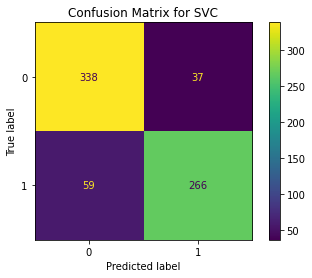

In [79]:
plt = plot_confusion_matrix(svc, gattr1, gattr_labels_f1)
plt.ax_.set_title('Confusion Matrix for SVC')

In [80]:
dtc = GaussianNB()
dtc.fit(gattr1, gattr_labels_f1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(gattr1.astype(np.float64))
cross_val_score(dtc, X_train_scaled, gattr_labels_f1, cv=7,
scoring="accuracy")

array([0.74, 0.56, 0.74, 0.68, 0.71, 0.71, 0.7 ])

In [81]:
dtc = KNeighborsClassifier()
dtc.fit(gattr1, gattr_labels_f1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(gattr1.astype(np.float64))
cross_val_score(dtc, X_train_scaled, gattr_labels_f1, cv=7,
scoring="accuracy")

array([0.77, 0.74, 0.77, 0.72, 0.79, 0.74, 0.77])

In [82]:
dtc = SVC()
dtc.fit(tattr1, tattr_labels_f1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(tattr1.astype(np.float64))
cross_val_score(dtc, X_train_scaled, tattr_labels_f1, cv=7,
scoring="accuracy")

array([0.32, 0.36, 0.32, 0.29, 0.31, 0.29, 0.29])

but gives low accuracy,precision,recall for race ethnicity